In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 1000

import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
label = pd.read_csv('train_label.csv')
train['label'] = label.label
data = pd.concat([train,test],axis=0,sort=False).reset_index(drop=True)

In [3]:
train['date'] =pd.to_datetime(train['date'])
train['hour'] = train['date'].dt.hour
train['day'] = train['date'].dt.day

In [4]:
data['date'] =pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day

In [5]:
feature_name = [col for col in data.columns if col not in ['ID','label']]

In [6]:
A_ft = ['A'+str(i) for i in range(1,4)]
B_ft = ['A'+str(i) for i in range(1,4)]
C_ft = ['C'+str(i) for i in range(1,4)]
D_ft = ['D'+str(i) for i in range(1,3)]
E_ft = ['E'+str(i) for i in range(1,30)]

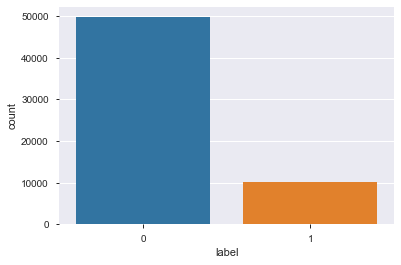

In [7]:
sns.countplot(x='label',data=label)

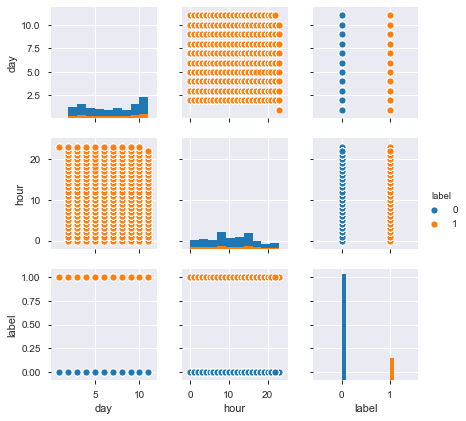

In [8]:
sns.pairplot(train[['day','hour']+['label']],hue='label',diag_kind = 'hist',height = 2)

In [ ]:
report = pp.ProfileReport(data)
report


In [ ]:
report.to_file('report.html')